In [1624]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [1625]:
training_df = pd.read_csv(r'C:\Users\peter\Downloads\vegis_traindata.csv')

# Neues Feature = Aspect Ration
aspectratio_df = training_df.loc[:]['Hight']/training_df.loc[:]['Width']
training_df['Aspect ratio'] = aspectratio_df
col = training_df.pop('Aspect ratio')
training_df.insert(loc=3, column='Aspect ratio', value=col)
training_df.head()

,Unnamed: 0,Hight,Width,Aspect ratio,R,G,B,green pixels,green onion pixels,ratio area,circularity,keypoints,mean keypoints,Label,Image
0,0,174,111,1.567568,121,98,76,0,0,0.747411,0.740759,39,12.664070,Kartoffel,Kartoffel_1
1,1,97,65,1.492308,109,84,50,0,0,0.785250,0.812063,18,7.130874,Kartoffel,Kartoffel_2
2,2,139,124,1.120968,144,118,84,0,0,0.826178,0.791622,36,5.622304,Kartoffel,Kartoffel_3
3,3,90,61,1.475410,108,80,44,0,0,0.782149,0.816098,14,10.524947,Kartoffel,Kartoffel_4
4,4,73,50,1.460000,110,83,46,0,0,0.764247,0.810826,11,6.394969,Kartoffel,Kartoffel_5


In [1626]:
training_clean_df = training_df.drop(columns=['Unnamed: 0', 'Image'])
training_clean_df=training_clean_df.drop(columns=["green pixels"])#,"Hight","Width"])#,"G","B"])
training_clean_df.head()

,Hight,Width,Aspect ratio,R,G,B,green onion pixels,ratio area,circularity,keypoints,mean keypoints,Label
0,174,111,1.567568,121,98,76,0,0.747411,0.740759,39,12.664070,Kartoffel
1,97,65,1.492308,109,84,50,0,0.785250,0.812063,18,7.130874,Kartoffel
2,139,124,1.120968,144,118,84,0,0.826178,0.791622,36,5.622304,Kartoffel
3,90,61,1.475410,108,80,44,0,0.782149,0.816098,14,10.524947,Kartoffel
4,73,50,1.460000,110,83,46,0,0.764247,0.810826,11,6.394969,Kartoffel


In [1627]:
training_clean_df.shape

(2137, 12)

In [1628]:
training_clean_df.drop_duplicates
training_clean_df.shape

(2137, 12)

In [1629]:
training_clean_df.dropna
training_clean_df.shape

(2137, 12)

In [1630]:
x_train = training_clean_df.drop(columns=['Label'])
y_train = training_clean_df.loc[:]['Label']
print ('x_train: ', x_train.shape, 'y_train: ', y_train.shape)

x_train:  (2137, 11) y_train:  (2137,)


In [1631]:
x_train.head()

,Hight,Width,Aspect ratio,R,G,B,green onion pixels,ratio area,circularity,keypoints,mean keypoints
0,174,111,1.567568,121,98,76,0,0.747411,0.740759,39,12.664070
1,97,65,1.492308,109,84,50,0,0.785250,0.812063,18,7.130874
2,139,124,1.120968,144,118,84,0,0.826178,0.791622,36,5.622304
3,90,61,1.475410,108,80,44,0,0.782149,0.816098,14,10.524947
4,73,50,1.460000,110,83,46,0,0.764247,0.810826,11,6.394969


In [1632]:
y_train.head()

0    Kartoffel
1    Kartoffel
2    Kartoffel
3    Kartoffel
4    Kartoffel
Name: Label, dtype: object

In [1633]:
test_df = pd.read_csv(r'C:\Users\peter\Downloads\TESTDATA_vegis_testdata.csv')

# Neues Feature = Aspect Ration
aspectratio_df = test_df.loc[:]['Hight']/test_df.loc[:]['Width']
test_df['Aspect ratio'] = aspectratio_df 
col = test_df.pop('Aspect ratio')
test_df.insert(loc=3, column='Aspect ratio', value=col)
test_df.head()

,Unnamed: 0,Hight,Width,Aspect ratio,R,G,B,green pixels,green onion pixels,ratio area,circularity,keypoints,mean keypoints,Label,Image
0,0,174,76,2.289474,101,71,36,0,0,0.737560,0.641460,24,8.030712,Kartoffel,Kartoffel_1
1,1,165,94,1.755319,120,102,78,0,2,0.000000,0.740219,43,6.675791,Kartoffel,Kartoffel_2
2,2,177,99,1.787879,107,88,64,0,0,0.730839,0.715150,40,4.414075,Kartoffel,Kartoffel_3
3,3,161,74,2.175676,107,88,64,0,0,0.742698,0.670203,25,6.183902,Kartoffel,Kartoffel_4
4,4,127,87,1.459770,103,89,72,0,0,0.740022,0.755528,44,6.381831,Kartoffel,Kartoffel_5


In [1634]:
test_clean_df = test_df.drop(columns=['Unnamed: 0', 'Image'])
test_clean_df=test_clean_df.drop(columns=["green pixels"])#,"Hight","Width"])#,"G","B",])
test_clean_df.head()

,Hight,Width,Aspect ratio,R,G,B,green onion pixels,ratio area,circularity,keypoints,mean keypoints,Label
0,174,76,2.289474,101,71,36,0,0.737560,0.641460,24,8.030712,Kartoffel
1,165,94,1.755319,120,102,78,2,0.000000,0.740219,43,6.675791,Kartoffel
2,177,99,1.787879,107,88,64,0,0.730839,0.715150,40,4.414075,Kartoffel
3,161,74,2.175676,107,88,64,0,0.742698,0.670203,25,6.183902,Kartoffel
4,127,87,1.459770,103,89,72,0,0.740022,0.755528,44,6.381831,Kartoffel


In [1635]:
test_clean_df.shape

(338, 12)

In [1636]:
test_clean_df.drop_duplicates
test_clean_df.shape

(338, 12)

In [1637]:
test_clean_df.dropna
test_clean_df.shape

(338, 12)

In [1638]:
x_test = test_clean_df.drop(columns=['Label'])
y_test = test_clean_df.loc[:]['Label']
print ('x_train: ', x_train.shape, 'y_train: ', y_train.shape,'x_test: ', x_test.shape,'y_test: ', y_test.shape,)

x_train:  (2137, 11) y_train:  (2137,) x_test:  (338, 11) y_test:  (338,)


In [1639]:
x_test.head()

,Hight,Width,Aspect ratio,R,G,B,green onion pixels,ratio area,circularity,keypoints,mean keypoints
0,174,76,2.289474,101,71,36,0,0.737560,0.641460,24,8.030712
1,165,94,1.755319,120,102,78,2,0.000000,0.740219,43,6.675791
2,177,99,1.787879,107,88,64,0,0.730839,0.715150,40,4.414075
3,161,74,2.175676,107,88,64,0,0.742698,0.670203,25,6.183902
4,127,87,1.459770,103,89,72,0,0.740022,0.755528,44,6.381831


In [1640]:
y_test.head()

0    Kartoffel
1    Kartoffel
2    Kartoffel
3    Kartoffel
4    Kartoffel
Name: Label, dtype: object

BAYES:

In [1641]:
from sklearn.naive_bayes import GaussianNB
bayes_clf = GaussianNB()
bayes_clf.fit(x_train, y_train)
print('Accurancy Bayes: ', bayes_clf.score(x_test,y_test))

Accurancy Bayes:  0.6923076923076923


In [1642]:
from sklearn.metrics import confusion_matrix
y_pred_bayes = bayes_clf.predict(x_test)
print(confusion_matrix(y_test,y_pred_bayes))

[[73  0  3  0  1  0]
 [ 3 46  0  0  0  1]
 [ 1  0 43  9 26  1]
 [ 0  0  7 10 13  0]
 [ 0  1 24 11 45  0]
 [ 0  1  0  1  1 17]]


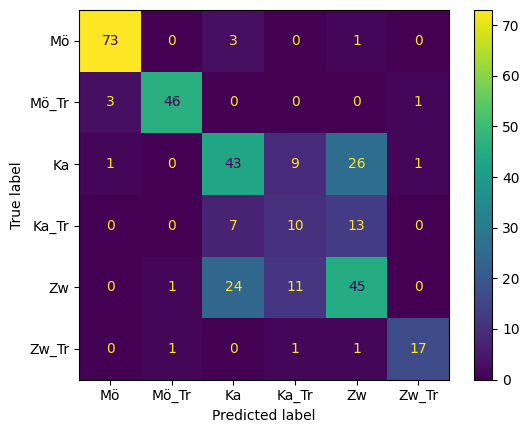

In [1643]:
from sklearn.metrics import ConfusionMatrixDisplay

display_labels = ['Mö', 'Mö_Tr', 'Ka', 'Ka_Tr', 'Zw', 'Zw_Tr']
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_bayes), display_labels=display_labels )
disp.plot()

DecisionTree:

In [1644]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
tree_clf = DecisionTreeClassifier()
#tree_clf = DecisionTreeClassifier(criterion='gini', min_samples_leaf=80)
#tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
tree_clf.fit(x_train,y_train)
print('Accurancy Decisiontree: ', tree_clf.score(x_test,y_test))

Accurancy Decisiontree:  0.8047337278106509


[Text(0.7322113525012893, 0.9761904761904762, 'x[6] <= 228.5\ngini = 0.818\nsamples = 2137\nvalue = [401, 357, 496, 245, 445, 193]'),
 Text(0.5863927926766375, 0.9285714285714286, 'x[2] <= 2.292\ngini = 0.757\nsamples = 1629\nvalue = [371, 5, 496, 243, 445, 69]'),
 Text(0.398675219185147, 0.8809523809523809, 'x[8] <= 0.783\ngini = 0.697\nsamples = 1278\nvalue = [45, 0, 485, 243, 441, 64]'),
 Text(0.2534167096441465, 0.8333333333333334, 'x[6] <= 18.0\ngini = 0.672\nsamples = 730\nvalue = [45, 0, 80, 182, 359, 64]'),
 Text(0.07877772047447137, 0.7857142857142857, 'x[9] <= 13.5\ngini = 0.619\nsamples = 649\nvalue = [35, 0, 79, 176, 349, 10]'),
 Text(0.020629190304280558, 0.7380952380952381, 'x[7] <= 0.622\ngini = 0.545\nsamples = 56\nvalue = [11, 0, 35, 1, 9, 0]'),
 Text(0.012377514182568335, 0.6904761904761905, 'x[0] <= 118.5\ngini = 0.512\nsamples = 18\nvalue = [11, 0, 0, 1, 6, 0]'),
 Text(0.008251676121712223, 0.6428571428571429, 'x[5] <= 35.0\ngini = 0.245\nsamples = 7\nvalue = [0, 0,

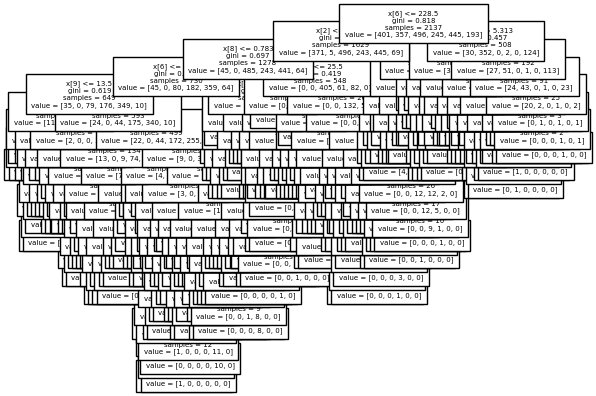

In [1645]:
plt.Figure(figsize=(4000,4000))
tree.plot_tree(tree_clf, fontsize=5)

In [1646]:
# from sklearn.metrics import confusion_matrix
y_pred_tree = tree_clf.predict(x_test)
print(confusion_matrix(y_test,y_pred_tree))

[[75  0  0  1  1  0]
 [ 0 49  0  0  0  1]
 [ 6  0 37 15 22  0]
 [ 0  0  4 23  3  0]
 [ 1  0  4  6 69  1]
 [ 0  1  0  0  0 19]]


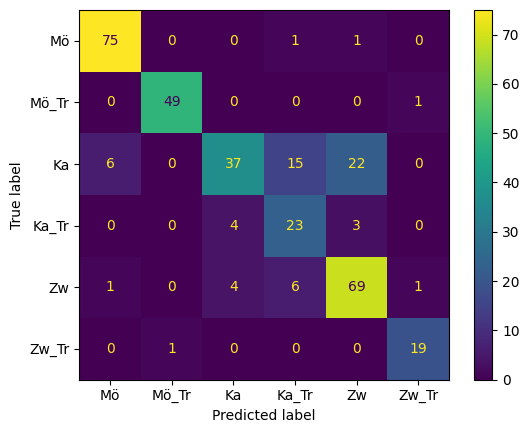

In [1647]:
from sklearn.metrics import ConfusionMatrixDisplay

display_labels = ['Mö', 'Mö_Tr', 'Ka', 'Ka_Tr', 'Zw', 'Zw_Tr']
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_tree), display_labels=display_labels )
disp.plot()

RandomForest:

In [1648]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier()
#forest_clf = RandomForestClassifier(n_estimators = 10, criterion= 'entropy', min_samples_leaf=60)
forest_clf.fit(x_train,y_train)

RandomForestClassifier()

In [1649]:
y_pred_rf = forest_clf.predict(x_test)
print('Accurancy Random Forest: ', forest_clf.score(x_test,y_test))

Accurancy Random Forest:  0.8520710059171598


In [1650]:
# from sklearn.metrics import confusion_matrix
y_pred_rf = forest_clf.predict(x_test)
print(confusion_matrix(y_test,y_pred_rf))

[[76  0  0  0  1  0]
 [ 2 48  0  0  0  0]
 [ 1  0 46 17 16  0]
 [ 0  0  4 22  4  0]
 [ 0  0  3  1 76  1]
 [ 0  0  0  0  0 20]]


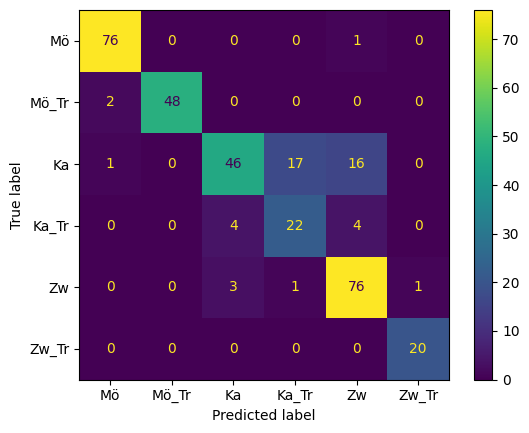

In [1651]:
from sklearn.metrics import ConfusionMatrixDisplay

display_labels = ['Mö', 'Mö_Tr', 'Ka', 'Ka_Tr', 'Zw', 'Zw_Tr']
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_rf), display_labels=display_labels )
disp.plot()